In [178]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as ma
import os
import shutil
import imageio
import random
import networkx as nx

## Ex1

In [179]:
def random_walk(steps):
    '''
    Function to generate path for random walk.
    
    steps: numbers of steps we want agent to do
    '''
    xs = [0]
    ys = [0]
    for s in range(steps):
        rand = np.random.choice([1, 2, 3, 4])
        if rand == 1:
            xs.append(xs[s] + 1)
            ys.append(ys[s])
        elif rand == 2:
            xs.append(xs[s] - 1)
            ys.append(ys[s])
        elif rand == 3:
            ys.append(ys[s] + 1)
            xs.append(xs[s])
        elif rand == 4:
            ys.append(ys[s] - 1)
            xs.append(xs[s])
    return [xs, ys]

In [180]:
def plot_walk(data, folder_name):
    '''
    Function to create a folder and put all png data needed to make gif.
    
    data: positions of agent in time (list of two lists)
    folder_name: name of folder from witch we want to take pngs (string)
    '''
    if os.path.exists(folder_name):
        shutil.rmtree(folder_name)
    os.makedirs(folder_name)
    for i in range(len(data[0])):
        plt.figure(figsize = (16, 9), dpi = 150)
        plt.scatter(data[0][i], data[1][i], color = 'black', marker = 'o')
        plt.plot(data[0][:i+1], data[1][:i+1], color = 'gray')
        plt.xlim([min(data[0])-4, max(data[0]) + 4])
        plt.ylim([min(data[1])-4, max(data[1]) + 4])
        plt.title(f'Agent position at step {i}',
                  fontsize=14)
        plt.savefig(f'{folder_name}/img_{i}.png', 
                    transparent = False,  
                    facecolor = 'white')
        plt.close()

In [181]:
def make_gif(data, folder_name, gif_name):
    '''
    Function to make a gif from folder full of pngs.
    
    data: positions of agent in time (list of two lists)
    folder_name: name of folder from witch we want to take pngs (string)
    gif_name: name for our gif (string)
    '''
    plot_walk(data, folder_name)
    sorted_files = sorted(os.listdir(folder_name), key=lambda x: int(x.split('_')[1].split('.')[0]) if '_' in x else -1)
    images = []
    for filename in sorted_files:
        if filename.endswith('.png'):  
            filepath = os.path.join(folder_name, filename)
            image = imageio.v2.imread(filepath)
            images.append(image)
    imageio.mimsave(gif_name, images, format='gif', duration=0.01)

In [182]:
make_gif(random_walk(100), 'random_walk', 'random_agent.gif')

## Ex2

In [183]:
def pearson(steps):
    '''
    Function returning position of Pearson random walk.
    
    steps: the amount of steps (integer)
    '''
    args = np.random.uniform(0, 2*np.pi, steps)
    xs = np.cumsum(np.sin(args))
    ys = np.cumsum(np.cos(args))
    return [xs, ys]

In [184]:
make_gif(pearson(100), 'pearson', 'pearson_agent.gif')

In [185]:
def give_left(steps):
    '''
    Function to return amount of left sided elements.
    
    steps: the amount of steps (integer)
    '''
    data = pearson(steps)
    left = [i for i in data[0] if i >= 0]
    return len(left)

In [186]:
def return_first_quater(steps):
    '''
    Function to return amount of elements in first quater.
    
    steps: the amount of steps (integer)
    '''
    data = pearson(steps)
    left = [i for i in range(len(data[0])) if data[0][i] >= 0 and data[1][i] >= 0]
    return len(left)

Plots of respectively left-sided elements and first quater elements for 1000 steps (10000 monte carlo steps):

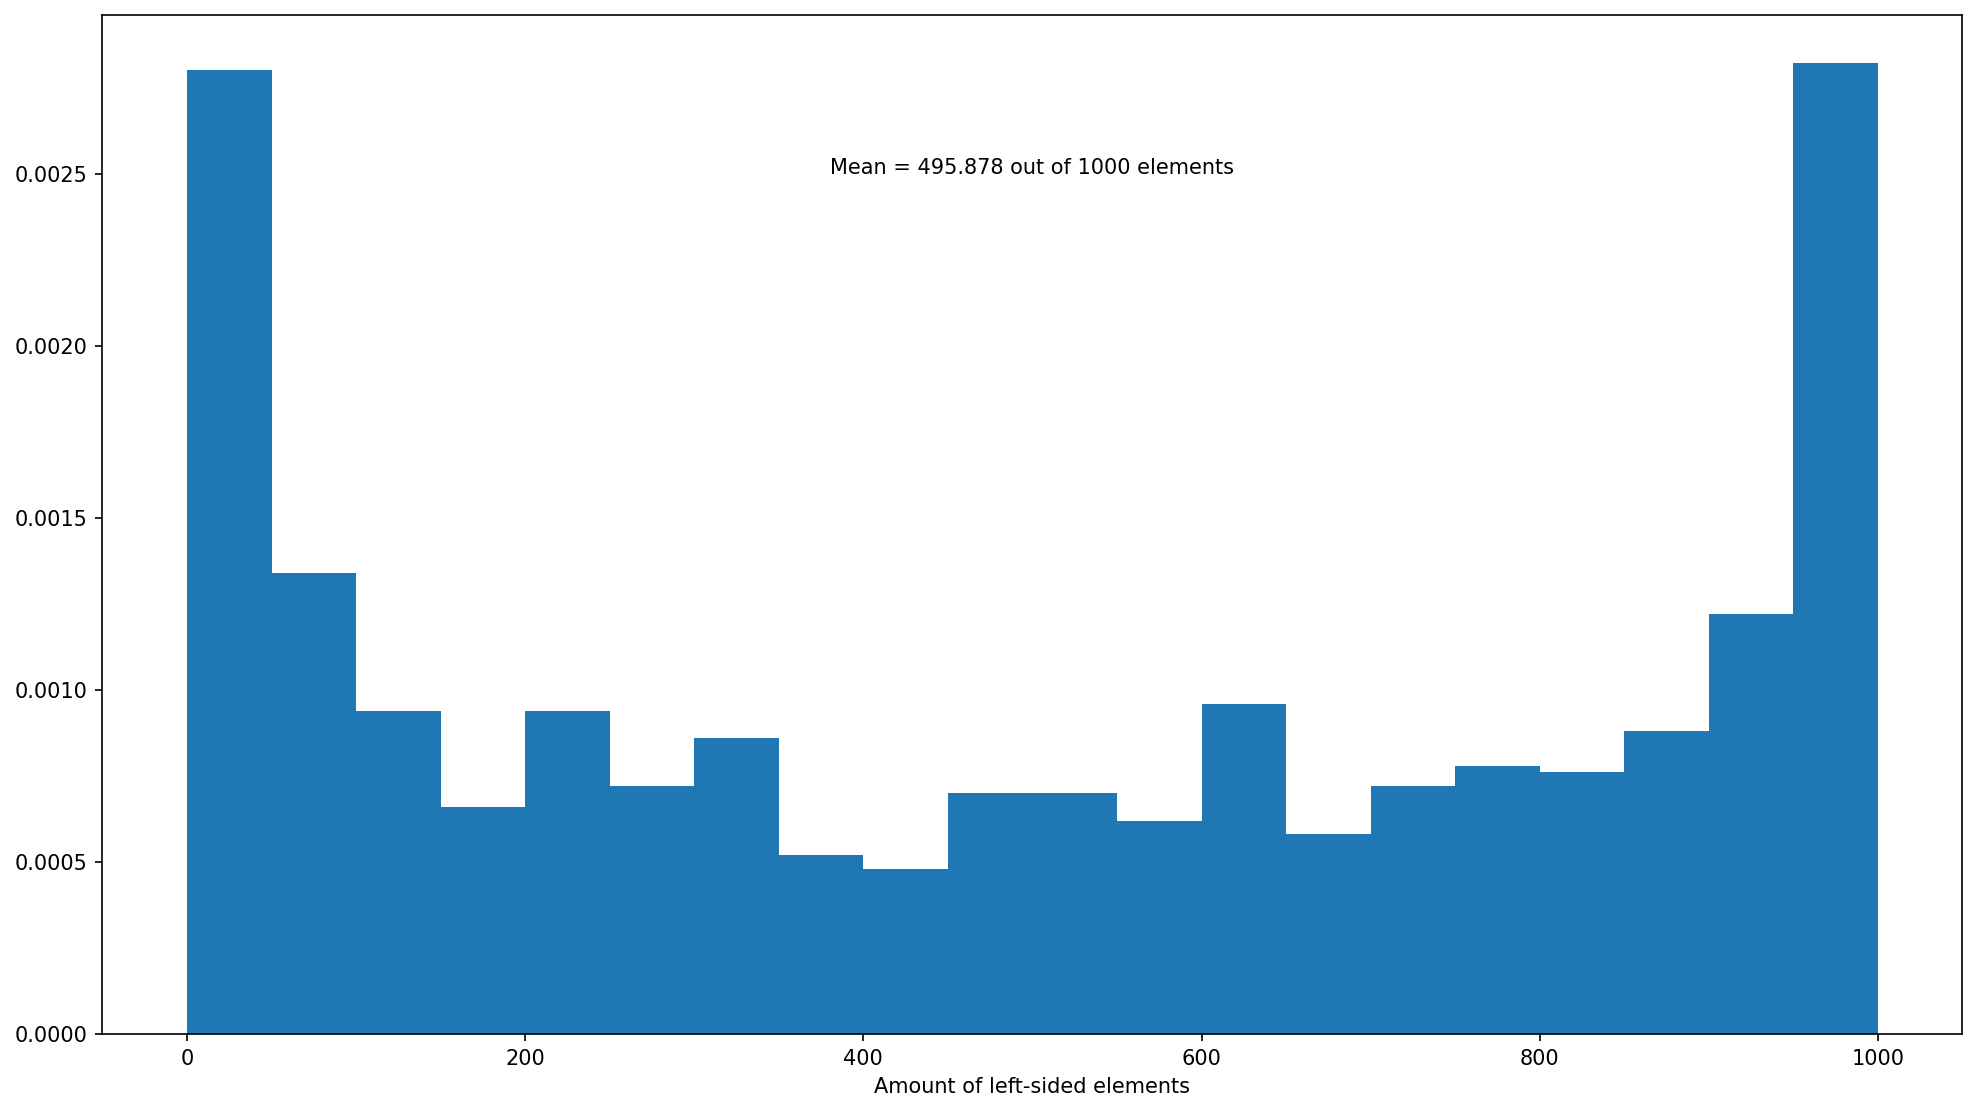

In [187]:
left = [give_left(1000) for i in range(1000)]
plt.figure(figsize = (16, 9), dpi = 150)
plt.hist(left, bins = 20, density = True)
plt.xlabel('Amount of left-sided elements')
plt.text(380, 0.0025, f'Mean = {np.mean(left)} out of {len(left)} elements')
plt.show()

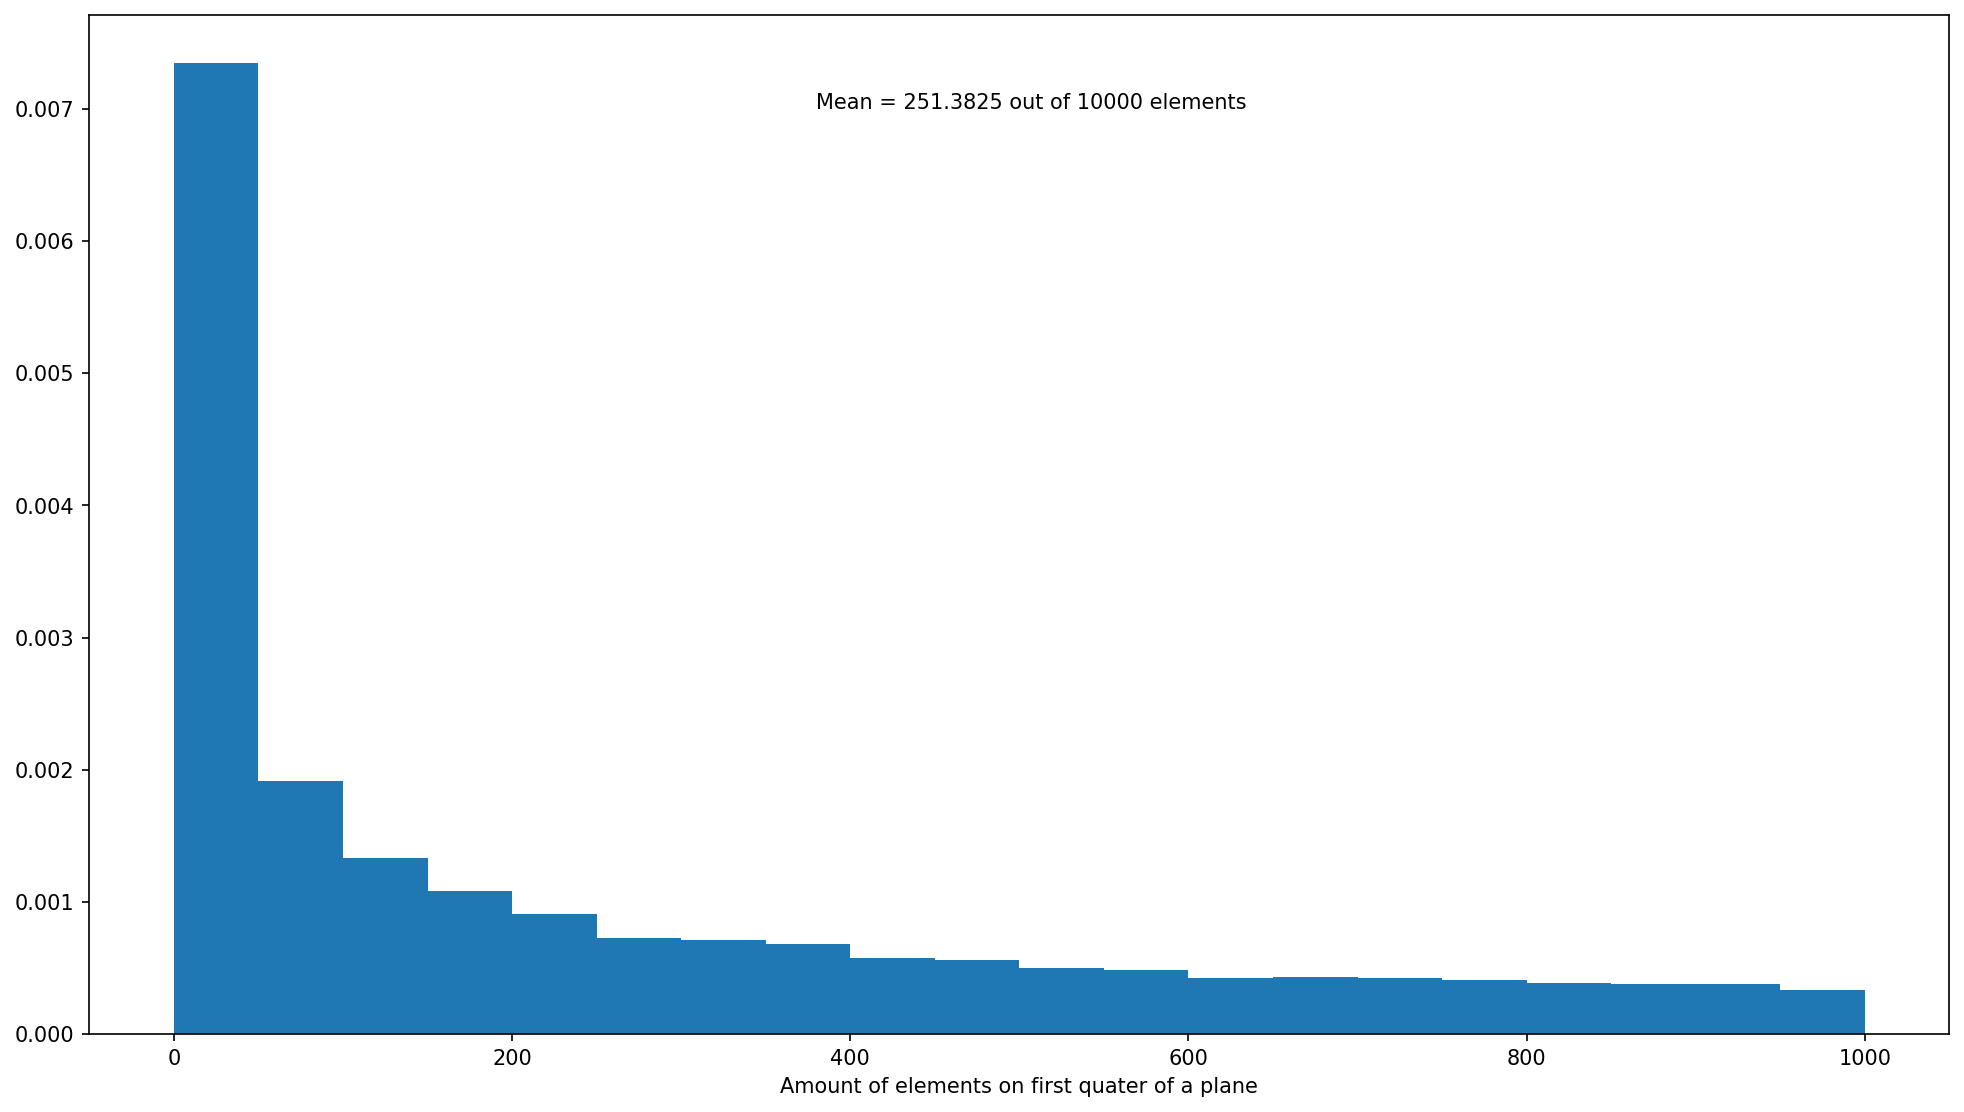

In [188]:
quater = [return_first_quater(1000) for i in range(10000)]
plt.figure(figsize = (16, 9), dpi = 150)
plt.hist(quater, bins = 20, density = True)
plt.xlabel('Amount of elements on first quater of a plane')
plt.text(380, 0.007, f'Mean = {np.mean(quater)} out of {len(quater)} elements')
plt.show()

## Ex3

### 3 functions from previous list

In [189]:
def random_graph(N, p):
    G = nx.Graph()
    for i in range(N):
        G.add_node(i)
    for node in G.nodes():
        for i in range(node + 1, N):
            if p >= np.random.uniform(0, 1):
                G.add_edge(node, i)
    return G

In [190]:
def watts_model(N, p):
    G = nx.Graph()
    G.add_node(0)
    G.add_node(1)
    G.add_edge(0, 1)
    for i in range(2, N):
        G.add_node(i)
        G.add_edge(i-1, i)
        G.add_edge(i-2, i)
    G.add_edge(N-1, 0)
    G.add_edge(N-1, 1)
    G.add_edge(N-2, 0)
    for edge in G.edges():
        if p >= np.random.uniform(0, 1):
            G.remove_edge(edge[0], edge[1])
            node = random.choice(list(G.nodes()))
            G.add_edge(edge[0], node)
    return G

In [191]:
def Barabasi_model(N, steps, links):
    G = nx.Graph()
    G.add_node(0)
    for i in range(1, N):
        G.add_node(i)
        G.add_edge(i-1, i)
    G.add_edge(N-1, 0)
    for i in range(1, steps + 1):
        nodes = random.sample(list(G.nodes()), k = links)
        G.add_node(N + i)
        for j in range(links):
            G.add_edge(N + i, nodes[j])
    return G

In [192]:
G1, G2, G3 = random_graph(20, 0.5), watts_model(20, 0.5), Barabasi_model(20, 5, 3)

In [193]:
def random_walk_on_graph(steps, graph):
    '''
    Function returning position of random walking agent on a graph.
    
    steps: the amount of steps (integer)
    graph: graph we want our agent to walk (networkx.classes.graph.Graph)
    '''
    positions = np.empty(steps)
    if not nx.is_connected(graph):
        raise ValueError("Graph must be connected")
    positions = [np.random.choice(list(graph.nodes()))]
    for s in range(steps):
        positions.append(np.random.choice(list(graph.neighbors(positions[s]))))
    return positions

In [194]:
def graph_plot(steps, graph, folder_name):
    '''
    Function generating a folder full of pngs needed to make a gif.
    
    steps: the amount of steps (integer)
    graph: graph we want our agent to walk (networkx.classes.graph.Graph)
    folder_name: name of folder we want to create (string)
    '''
    nodes = list(graph.nodes())
    edges = list(graph.edges())
    position = nx.spring_layout(graph)
    data = random_walk_on_graph(steps, graph)
    if os.path.exists(folder_name):
        shutil.rmtree(folder_name)
    os.makedirs(folder_name)
    edges_color = ["black"]*len(edges)
    for s in range(steps):
        if s > 0:
            if data[s - 1] < data[s]:
                edges_color[edges.index((data[s - 1], data[s]))] = "red"
            else:
                edges_color[edges.index((data[s], data[s - 1]))] = "red"
        nodes_color = ["blue"]*len(nodes)
        nodes_color[nodes.index(data[s])] = "red"
        plt.figure(figsize = (16, 9), dpi = 150)
        nx.draw_networkx(graph, node_color = nodes_color,  pos = position, with_labels = False, edge_color = edges_color)
        plt.title(f'agent position at step {s}', fontsize=14)
        plt.savefig(f'{folder_name}/img_{s}.png', transparent = False, facecolor = 'white')
        plt.close()

In [195]:
def graph_gif(steps, graph, folder_name, gif_name):
    '''
    Function to make a gif from folder full of pngs.
    
    steps: the amount od steps (integer)
    folder_name: name of folder from witch we want to take pngs (string)
    gif_name: name for our gif (string)
    '''
    graph_plot(steps, graph, folder_name)
    sorted_files = sorted(os.listdir(folder_name), key=lambda x: int(x.split('_')[1].split('.')[0]) if '_' in x else -1)
    images = []
    for filename in sorted_files:
        if filename.endswith('.png'):  
            filepath = os.path.join(folder_name, filename)
            image = imageio.v2.imread(filepath)
            images.append(image)
    imageio.mimsave(gif_name, images, format='gif', duration=0.02)

In [196]:
graph_gif(100, G, "Graph", "RandomGraph.gif")

In [ ]:
graph_gif(100, G, "Graph", "Watts.gif")

In [ ]:
graph_gif(100, G, "Graph", "Barabasi.gif")

In [ ]:
def hitting_time(graph, final_node):
    '''
    Function calcuating time for a agent to hit chosen node. Note that now the starting position 
    is not random, it is set to 0. It is working as long as aget steps on chosen node.
    
    graph: graph we want our agent to walk (networkx.classes.graph.Graph)
    final_node: node we are calcuating hitting time which
    '''
    if not nx.is_connected(graph):
        raise ValueError("Graph must be connected")
    position = 0
    i = 0
    while True:
        if position == final_node:
            return i
        position = np.random.choice(list(graph.neighbors(position)))
        i += 1

Plogts presenting mean hitting time for all nodes for respectively random graph, Watts-Strogatz model and Barabasi-Albert model (10000 monte carlo steps to calculate means). Probabilities for random graph and Watts-Strogatz model are $0.5$ and they all have 100 nodes each. Barabasi-Albert model started with 80 nodes making 20 new nodes with 8 links each.

In [ ]:
G1, G2, G3 = random_graph(100, 0.5), watts_model(100, 0.5), Barabasi_model(80, 20, 8)

In [ ]:
N = 10000
times = np.zeros(len(list(G1.nodes())))
for j in range(N):
    times += [hitting_time(G1, i) for i in list(G1.nodes())]
times = times/N
plt.figure(figsize = (16, 9), dpi = 150)
plt.bar([int(i) for i in list(G1.nodes())], times)
plt.xticks([int(i) for i in list(G1.nodes())])
plt.show()

In [ ]:
times = np.zeros(len(list(G2.nodes())))
for j in range(N):
    times += [hitting_time(G2, i) for i in list(G2.nodes())]
times = times/N
plt.figure(figsize = (16, 9), dpi = 150)
plt.bar([int(i) for i in list(G2.nodes())], times)
plt.xticks([int(i) for i in list(G2.nodes())])
plt.show()

In [ ]:
times = np.zeros(len(list(G3.nodes())))
for j in range(N):
    times += [hitting_time(G3, i) for i in list(G3.nodes())]
times = times/N
plt.figure(figsize = (16, 9), dpi = 150)
plt.bar([int(i) for i in list(G3.nodes())], times)
plt.xticks([int(i) for i in list(G3.nodes())])
plt.show()